Random Forest model MAE: 4.942062823062453
Random Forest model MAPE: 0.13409338008620025


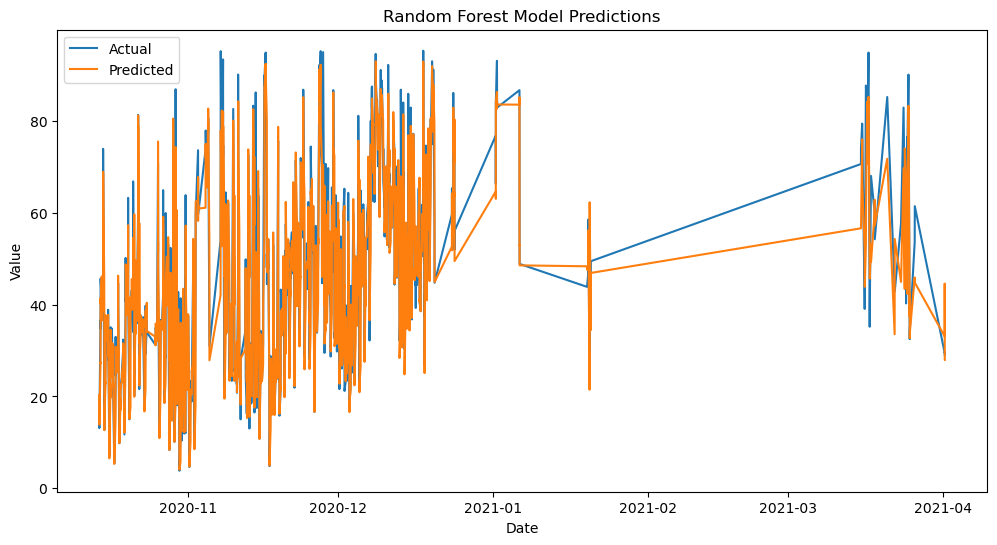

In [196]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression


# Load data
file_path = 'cleaned_data/PM1_cleaned.csv'
data = pd.read_csv(file_path)

# # Drop unnecessary columns
# columns_to_drop = ['_id', 'station', 'particulate_matter']
# data.drop(columns=columns_to_drop, inplace=True)

# Ensure datetime column exists and set as index
if 'datetime' in data.columns:
    data['datetime'] = pd.to_datetime(data['datetime'])
    data.set_index('datetime', inplace=True)
else:
    raise KeyError("The 'datetime' column is missing from the data.")

# Feature Engineering
data['hour'] = data.index.hour
data['dayofweek'] = data.index.dayofweek
data['month'] = data.index.month
data['lag1'] = data['value'].shift(1)
data['rolling_mean'] = data['value'].rolling(window=3).mean()

# Drop NaN values created by shift and rolling
data.dropna(inplace=True)

# Splitting data into features and target
X = data[['hour', 'dayofweek', 'month', 'lag1', 'rolling_mean']]
y = data['value']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# Model Training
rf_model = RandomForestRegressor(n_estimators=100)
rf_model.fit(X_train, y_train)

# Predictions
y_pred = rf_model.predict(X_test)

# # Evaluate model performance
# mse = mean_squared_error(y_test, y_pred)
# print(f'Random Forest model MSE: {mse}')
mae = mean_absolute_error(y_test, y_pred)
print(f'Random Forest model MAE: {mae}')
mae = mean_absolute_percentage_error(y_test, y_pred)
print(f'Random Forest model MAPE: {mae}')
# Plot predictions vs actual values
plt.figure(figsize=(12, 6))
plt.plot(y_test.index, y_test, label='Actual')
plt.plot(y_test.index, y_pred, label='Predicted')
plt.xlabel('Date')
plt.ylabel('Value')
plt.title('Random Forest Model Predictions')
plt.legend()
plt.show()


Linear Regression model MAE: 4.912947433088622
Linear Regression model MAPE: 0.14395280537489807


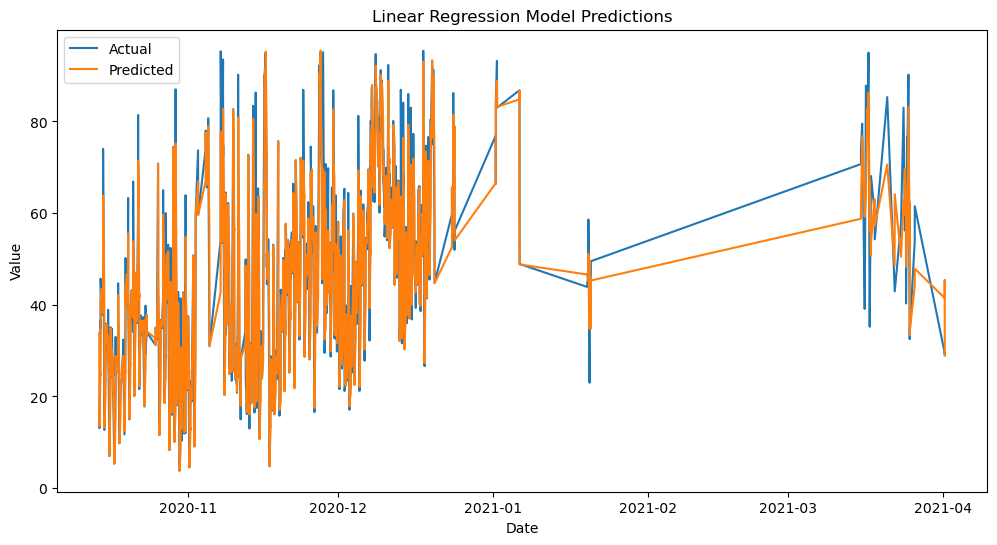

In [197]:

# Model Training
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

# Predictions
y_pred = linear_model.predict(X_test)

# # Evaluate model performance
# mse = mean_squared_error(y_test, y_pred)
# print(f'Linear Regression model MSE: {mse}')
mae = mean_absolute_error(y_test, y_pred)
print(f'Linear Regression model MAE: {mae}')
mae = mean_absolute_percentage_error(y_test, y_pred)
print(f'Linear Regression model MAPE: {mae}')
# Plot predictions vs actual values
plt.figure(figsize=(12, 6))
plt.plot(y_test.index, y_test, label='Actual')
plt.plot(y_test.index, y_pred, label='Predicted')
plt.xlabel('Date')
plt.ylabel('Value')
plt.title('Linear Regression Model Predictions')
plt.legend()
plt.show()





Lasso Regression model MAE: 4.912947433088622
Lasso Regression model MAPE: 0.14395280537489807


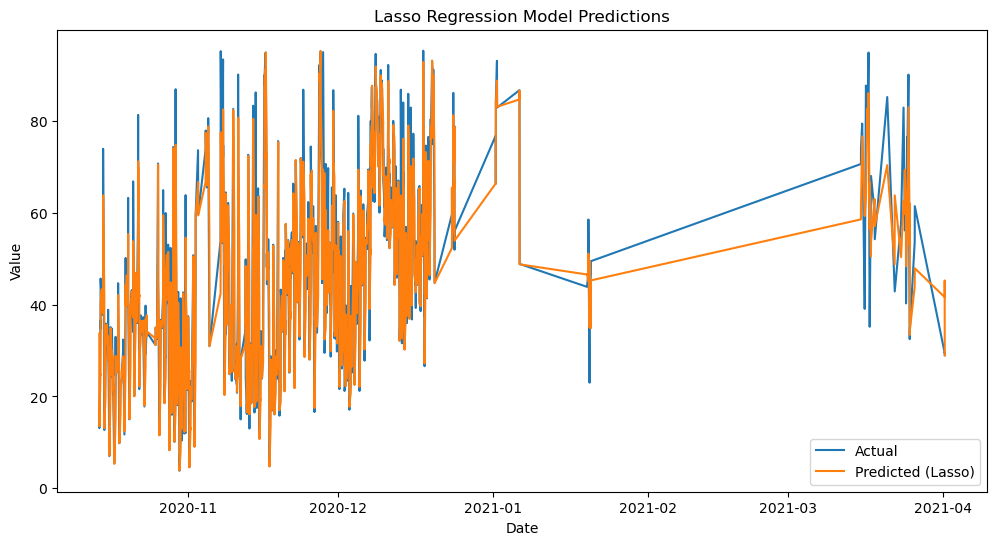

In [205]:
from sklearn.linear_model import Lasso

# Model Training
lasso_model = Lasso(alpha=0.1)  # You can adjust the alpha parameter for regularization
lasso_model.fit(X_train, y_train)

# Predictions
y_pred_lasso = lasso_model.predict(X_test)

# # Evaluate model performance
# mse_lasso = mean_squared_error(y_test, y_pred_lasso)
# print(f'Lasso Regression model MSE: {mse_lasso}')
# Calculate Mean Absolute Error
mae = mean_absolute_error(y_test, y_pred)
print(f'Lasso Regression model MAE: {mae}')
mae = mean_absolute_percentage_error(y_test, y_pred)
# Plot predictions vs actual valuesmae = mean_absolute_percentage_error(y_test, y_pred)
print(f'Lasso Regression model MAPE: {mae}')
plt.figure(figsize=(12, 6))
plt.plot(y_test.index, y_test, label='Actual')
plt.plot(y_test.index, y_pred_lasso, label='Predicted (Lasso)')
plt.xlabel('Date')
plt.ylabel('Value')
plt.title('Lasso Regression Model Predictions')
plt.legend()
plt.show()
